In [2]:
import kagglehub
from rich.jupyter import display

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [49]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(f"{path}/books.csv")
data.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [10]:
# Display basic information about the dataset
data.info()

# get categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Display descriptive statistics
display(data[numerical_cols].describe())
print()
display(data[categorical_cols].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


,isbn10,title,subtitle,authors,categories,thumbnail,description
count,6810,6810,2381,6738,6711,6481,6548
unique,6810,6398,2009,3780,567,6481,6474
top,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,No Marketing Blurb
freq,1,11,226,37,2588,1,6


In [11]:
# check missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
display(missing_values)

Missing values in each column:


subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

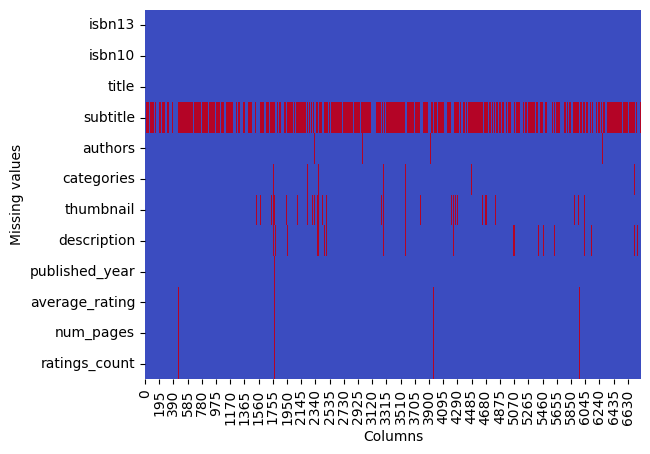

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(data.isna().transpose(), cbar=False, cmap="coolwarm")

plt.xlabel('Columns')
plt.ylabel('Missing values')
plt.show()

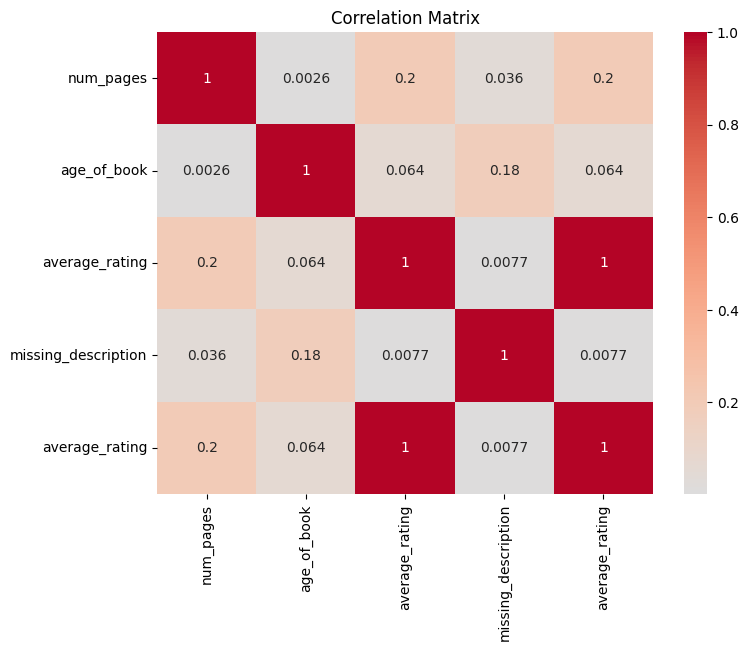

In [14]:
import numpy as np

data['missing_description'] = np.where(data['description'].isnull(), 1, 0)
data['age_of_book'] = 2025 - data['published_year']

columns_of_interest = ['num_pages', 'age_of_book', 'average_rating', 'missing_description', 'average_rating']
corr = data[columns_of_interest].corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [18]:
data_missing = data[~(data['description'].isna()) &
     ~(data['num_pages'].isna()) &
     ~(data['published_year'].isna()) &
     ~(data['average_rating'].isna()) &
     ~(data['ratings_count'].isna())
]

data_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [19]:
# Display basic information about the dataset
data_missing.info()

# get categorical and numerical columns
categorical_cols = data_missing.select_dtypes(include=['object']).columns
numerical_cols = data_missing.select_dtypes(include=['number']).columns

# Display descriptive statistics
display(data_missing[numerical_cols].describe())
print()
display(data_missing[categorical_cols].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6507 non-null   int64  
 1   isbn10               6507 non-null   object 
 2   title                6507 non-null   object 
 3   subtitle             2281 non-null   object 
 4   authors              6444 non-null   object 
 5   categories           6474 non-null   object 
 6   thumbnail            6293 non-null   object 
 7   description          6507 non-null   object 
 8   published_year       6507 non-null   float64
 9   average_rating       6507 non-null   float64
 10  num_pages            6507 non-null   float64
 11  ratings_count        6507 non-null   float64
 12  missing_description  6507 non-null   int64  
 13  age_of_book          6507 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 762.5+ KB


,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000
mean,9.780668e+12,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502
std,5.868404e+08,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000
25%,9.780317e+12,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000
50%,9.780552e+12,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000
75%,9.780807e+12,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000


,isbn10,title,subtitle,authors,categories,thumbnail,description
count,6507,6507,2281,6444,6474,6293,6507
unique,6507,6133,1915,3629,531,6293,6434
top,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,No Marketing Blurb
freq,1,10,225,37,2523,1,6


In [20]:
# check missing values
missing_values = data_missing.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in each column:")
display(missing_values)

Missing values in each column:


subtitle      4226
authors         63
categories      33
thumbnail      214
dtype: int64

## Categories

In [22]:
data_missing['categories'].value_counts().reset_index().sort_values('count', ascending=False).head(20)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
5,Philosophy,154
6,Comics & Graphic Novels,152
7,Religion,136
8,Drama,126
9,Juvenile Nonfiction,114


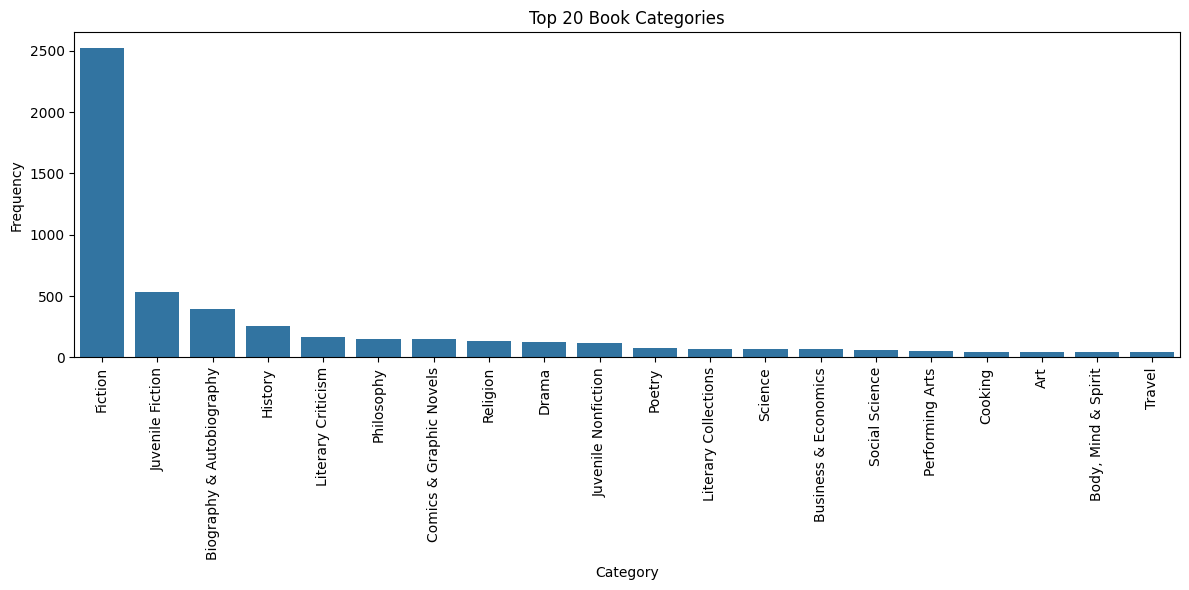

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

top20 = (
    data_missing['categories']
    .value_counts()
    .reset_index()
)

top20.columns = ['category', 'freq']

# Take top 20
top20 = top20.head(20)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top20,
    x='category',
    y='freq'
)

plt.xticks(rotation=90)
plt.title('Top 20 Book Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Description close look

In [37]:
data_missing.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0


In [50]:
data_missing['words_in_description'] = data_missing['description'].str.split().str.len()
data_missing[['description', 'words_in_description']].head(10)

,description,words_in_description
0,A NOVEL THAT READERS and critics have been eag...,199
1,A new 'Christie for Christmas' -- a full-lengt...,205
2,Volume Two of Stephen Donaldson's acclaimed se...,14
3,"A memorable, mesmerizing heroine Jennifer -- b...",57
4,Lewis' work on the nature of love divides love...,45
5,"""In The Problem of Pain, C.S. Lewis, one of th...",75
6,Donation.,1
7,Until Vasco da Gama discovered the sea-route t...,80
8,A new-cover reissue of the fourth book in the ...,160
9,Kate Blackwell is an enigma and one of the mos...,30


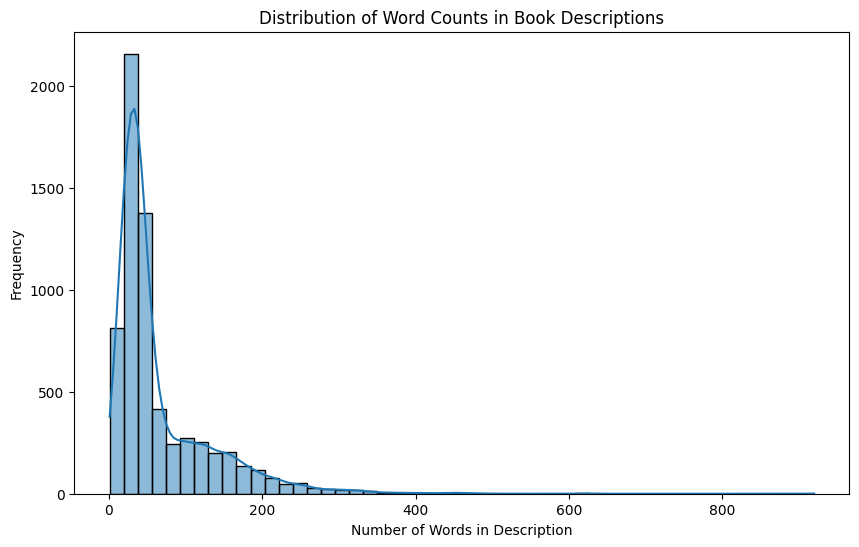

In [39]:
# get counts of words in description
plt.figure(figsize=(10, 6))
sns.histplot(data_missing['words_in_description'], bins=50, kde=True)
plt.title('Distribution of Word Counts in Book Descriptions')
plt.xlabel('Number of Words in Description')
plt.ylabel('Frequency')
plt.show()

In [46]:
data_missing.loc[data_missing['words_in_description'].between(25, 34), ['description', 'words_in_description']].head(100)

,description,words_in_description
9,Kate Blackwell is an enigma and one of the mos...,30
14,"Available in the U.S. for the first time, this...",29
20,"It is 1937, and Charles Ashworth, a Canon to t...",33
21,Reissue of the author's most famous and well-l...,30
46,No one believes a little girl when she insists...,30
...,...,...
870,A collection of poignant love letters between ...,29
893,"""With a biting wit and perceptive insight, Dor...",27
902,"London 1934. Gordon Comstock, copywriter for t...",25
905,This text is the classic novel of the little m...,30


In [47]:
data_missing_25_words = data_missing[data_missing['words_in_description'] >= 25]
data_missing_25_words.shape

(5197, 15)

## Subtitle

In [51]:
data_missing_25_words['title_and_subtitle'] = (
    np.where(data_missing_25_words['subtitle'].isna(), data_missing_25_words['title'],
 data_missing_25_words[['title', 'subtitle']].astype(str).agg(": ".join, axis=1))
)

data_missing_25_words[['title', 'subtitle', 'title_and_subtitle']].head(10)

,title,subtitle,title_and_subtitle
0,Gilead,NaN,Gilead
1,Spider's Web,A Novel,Spider's Web: A Novel
3,Rage of angels,NaN,Rage of angels
4,The Four Loves,NaN,The Four Loves
5,The Problem of Pain,NaN,The Problem of Pain
7,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Empires of the Monsoon: A History of the India...
8,The Gap Into Madness,Chaos and Order,The Gap Into Madness: Chaos and Order
9,Master of the Game,NaN,Master of the Game
12,Warhost of Vastmark,NaN,Warhost of Vastmark
13,The Once and Future King,NaN,The Once and Future King


In [55]:
data_missing_25_words['tagged_description'] = data_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)
data_missing_25_words['tagged_description'].head(10)

0     9780002005883 A NOVEL THAT READERS and critics...
1     9780002261982 A new 'Christie for Christmas' -...
3     9780006178736 A memorable, mesmerizing heroine...
4     9780006280897 Lewis' work on the nature of lov...
5     9780006280934 "In The Problem of Pain, C.S. Le...
7     9780006380832 Until Vasco da Gama discovered t...
8     9780006470229 A new-cover reissue of the fourt...
9     9780006472612 Kate Blackwell is an enigma and ...
12    9780006482079 Tricked once more by his wily ha...
13    9780006483014 An omnibus volume of the author'...
Name: tagged_description, dtype: object

In [59]:
(
    data_missing_25_words
    .drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1)
    .to_csv('data/books_cleaned.csv', index=False)
)